In [20]:
import pandas as pd
from sklearn.svm import OneClassSVM


In [2]:
data = pd.read_csv("momentum_strategy_1.csv.csv")
data.head(10)


,Ticker,Price,One Year Price Return,One Year Return Percentile,Six Month Price Return,Six Month Return Percentile,Three Month Price Return,Three Month Return Percentile,One Month Price Return,One Month Return Percentile,Momentum Score,Number of Shares to Buy
0,FANG,$102.81,167.05%,98.42%,110.39%,99.80%,23.90%,95.84%,15.58%,97.23%,97.82%,786
1,NVDA,$836.32,117.59%,92.67%,57.08%,96.24%,47.60%,100.00%,25.29%,99.60%,97.13%,96
2,DXC,$42.36,156.16%,97.43%,58.69%,96.83%,31.47%,99.01%,6.28%,83.56%,94.21%,1909
3,OXY,$32.72,92.75%,85.54%,91.00%,99.21%,20.26%,92.28%,15.90%,97.43%,93.61%,2472
4,IT,$258.87,107.52%,91.09%,57.23%,96.44%,32.85%,99.60%,6.90%,84.75%,92.97%,312
5,FTNT,$251.21,75.22%,76.83%,65.90,98.02%,31.15%,98.61%,13.32%,95.64%,92.28%,322
6,LB,$76.99,398.86%,100.00%,100.50%,99.60%,20.22%,92.08%,4.18%,77.03%,92.18%,1050
7,WAT,$359.10,95.71%,86.73%,43.62%,92.87%,24.16%,96.04%,10.55%,92.28%,91.98%,225
8,MRO,$13.97,141.58%,96.83%,116.28%,100.00%,20.86%,92.87%,3.04%,72.48%,90.54%,5790
9,TGT,$256.84,107.93%,91.29%,38.78%,87.33%,22.71%,94.65%,7.28%,86.93%,90.05%,314


In [3]:
data.shape

(52, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Ticker                         52 non-null     object
 1   Price                          52 non-null     object
 2   One Year Price Return          52 non-null     object
 3   One Year Return Percentile     52 non-null     object
 4   Six Month Price Return         51 non-null     object
 5   Six Month Return Percentile    52 non-null     object
 6   Three Month Price Return       51 non-null     object
 7   Three Month Return Percentile  52 non-null     object
 8   One Month Price Return         52 non-null     object
 9   One Month Return Percentile    52 non-null     object
 10  Momentum Score                 52 non-null     object
 11  Number of Shares to Buy        52 non-null     int64 
dtypes: int64(1), object(11)
memory usage: 5.0+ KB


Пока просто преобразуем данные в удобный формат. Попробуем сначала просто перевести все в числа(из процентов). Позже проверим на аномальное данные(слишком большие, слишком маленькие, проверить на коинтеграцию времменных рядов, проверить на выход forecatinga аримы по временному ряду)

In [5]:
data_drop = data.drop(['Ticker', 'Number of Shares to Buy'], axis= 1)
data_drop.columns = ['Price', '1y_price', '1y_perc', '6m_price', '6m_perc', '3m_price', '3m_perc', '1m_price', '1m_perc', 'mom_score']
data_drop = data_drop.apply(lambda x: x.str.lstrip('$%USD').str.rstrip('%'))
data_drop = data_drop.astype(float)
data_drop = data_drop[['Price', 'mom_score'] + [x for x in data_drop.columns if x not in ['mom_score', 'Price']]] 
data_drop

,Price,mom_score,1y_price,1y_perc,6m_price,6m_perc,3m_price,3m_perc,1m_price,1m_perc
0,102.81,97.82,167.05,98.42,110.39,99.80,23.90,95.84,15.58,97.23
1,836.32,97.13,117.59,92.67,57.08,96.24,47.60,100.00,25.29,99.60
2,42.36,94.21,156.16,97.43,58.69,96.83,31.47,99.01,6.28,83.56
3,32.72,93.61,92.75,85.54,91.00,99.21,20.26,92.28,15.90,97.43
4,258.87,92.97,107.52,91.09,57.23,96.44,32.85,99.60,6.90,84.75
5,251.21,92.28,75.22,76.83,65.90,98.02,31.15,98.61,13.32,95.64
6,76.99,92.18,398.86,100.00,100.50,99.60,20.22,92.08,4.18,77.03
7,359.10,91.98,95.71,86.73,43.62,92.87,24.16,96.04,10.55,92.28
8,13.97,90.54,141.58,96.83,116.28,100.00,20.86,92.87,3.04,72.48
9,256.84,90.05,107.93,91.29,38.78,87.33,22.71,94.65,7.28,86.93


Выведем базовые статистики, по которым можно сразу увидеть выбросы, которые портят данные. Например, отрицательные значения в колонках. 

In [6]:
data_drop.describe()

,Price,mom_score,1y_price,1y_perc,6m_price,6m_perc,3m_price,3m_perc,1m_price,1m_perc
count,52.000000,52.000000,52.000000,52.000000,51.000000,52.000000,51.000000,52.000000,52.000000,52.000000
mean,283.254231,84.148846,103.777308,722.162885,27.754706,87.323077,20.568431,88.777308,7.020962,78.716538
std,510.788202,5.445852,56.050444,4611.067456,154.064830,11.372437,7.334499,10.070448,6.756564,15.838819
min,13.970000,77.620000,32.130000,49.110000,-1039.190000,55.050000,6.830000,56.240000,-1.030000,45.740000
25%,64.047500,79.662500,70.792500,72.820000,31.895000,80.250000,16.660000,85.492500,2.125000,67.427500
50%,126.800000,83.020000,92.270000,85.940000,41.370000,89.905000,19.040000,90.595000,6.050000,83.070000
75%,267.780000,87.055000,119.885000,94.057500,58.840000,96.880000,24.400000,96.140000,9.435000,91.340000
max,2678.610000,97.820000,398.860000,33333.470000,116.280000,100.000000,47.600000,100.000000,30.660000,100.000000


На гистограммах сразу видно, какие аномалии выходят за рамки среднего и дисперсии выборки. Позже мы от них избавимся, так их значения не являются представимыми. Заметим, что после их удаления масштаб графиков станет более разумным, и некоторые зависимоти станут более явными. Также уберем отсутствующие значение, так нам необходимо знать, конретные данные и заменой на среднее будет не разумным.

array([[<Axes: title={'center': 'mom_score'}>,
        <Axes: title={'center': '1y_price'}>],
       [<Axes: title={'center': '1y_perc'}>,
        <Axes: title={'center': '6m_price'}>],
       [<Axes: title={'center': '6m_perc'}>,
        <Axes: title={'center': '3m_price'}>],
       [<Axes: title={'center': '3m_perc'}>,
        <Axes: title={'center': '1m_price'}>]], dtype=object)

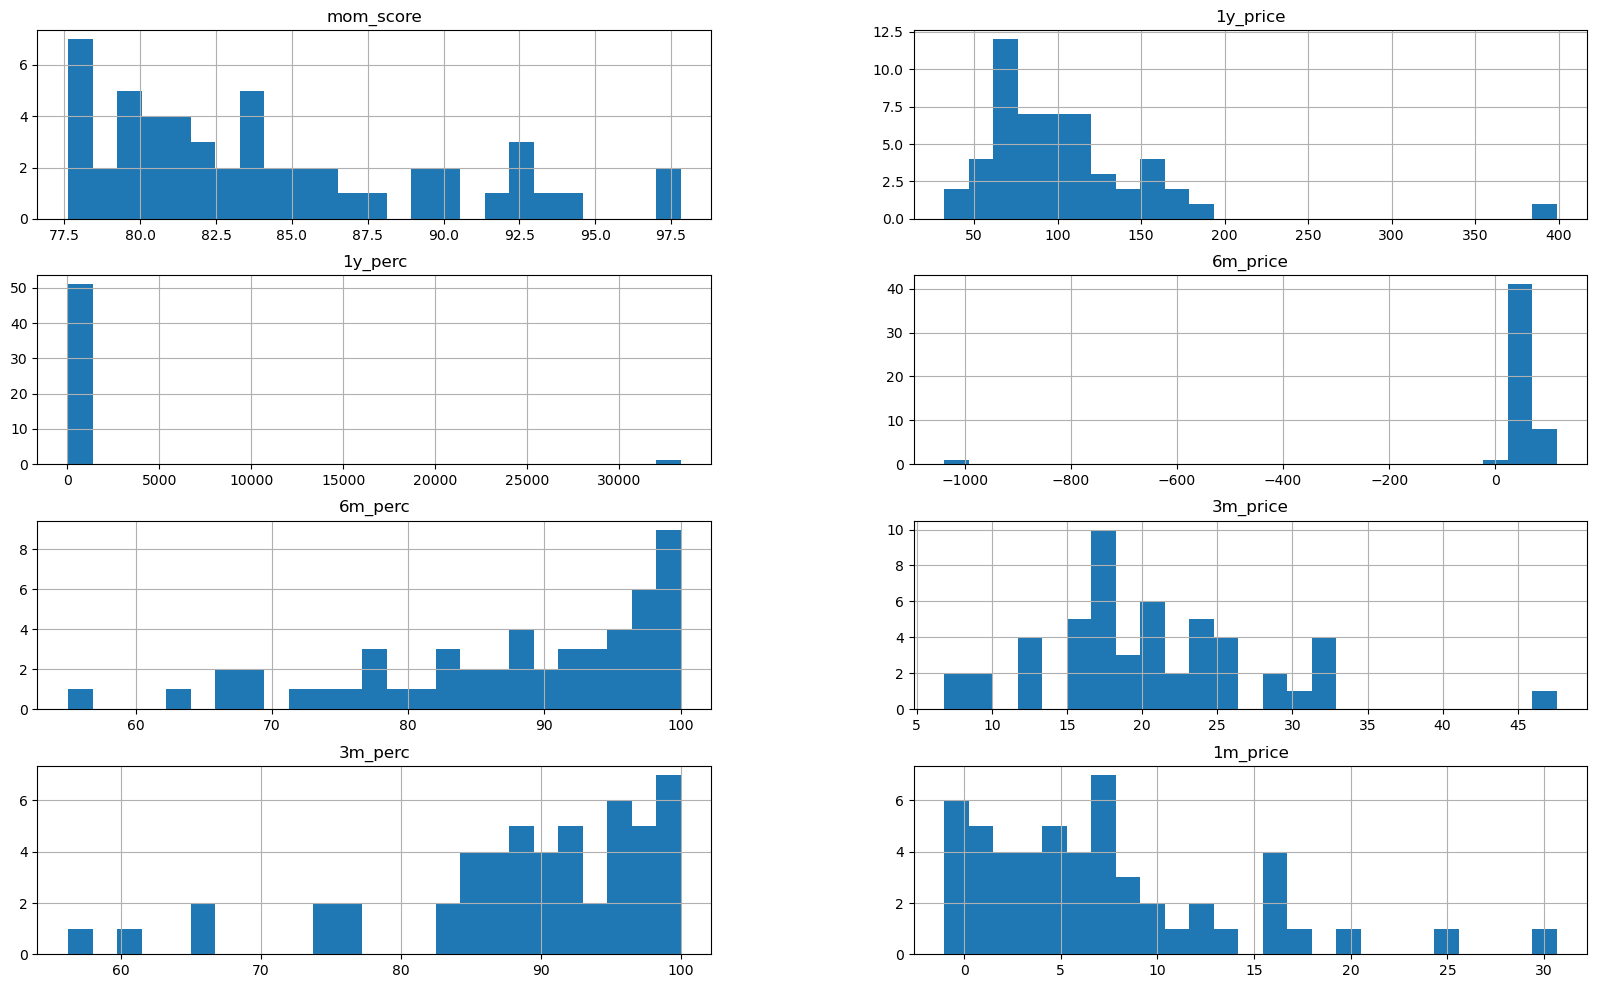

In [7]:
data_drop.iloc[:, 1:-1].hist(layout=(4,2), figsize=(20, 12), bins=25)


Рассмотрим матрицу зависимостей, из них видно множество аномалей.

array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='mom_score', ylabel='Price'>,
        <Axes: xlabel='1y_price', ylabel='Price'>,
        <Axes: xlabel='1y_perc', ylabel='Price'>,
        <Axes: xlabel='6m_price', ylabel='Price'>,
        <Axes: xlabel='6m_perc', ylabel='Price'>,
        <Axes: xlabel='3m_price', ylabel='Price'>,
        <Axes: xlabel='3m_perc', ylabel='Price'>,
        <Axes: xlabel='1m_price', ylabel='Price'>,
        <Axes: xlabel='1m_perc', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='mom_score'>,
        <Axes: xlabel='mom_score', ylabel='mom_score'>,
        <Axes: xlabel='1y_price', ylabel='mom_score'>,
        <Axes: xlabel='1y_perc', ylabel='mom_score'>,
        <Axes: xlabel='6m_price', ylabel='mom_score'>,
        <Axes: xlabel='6m_perc', ylabel='mom_score'>,
        <Axes: xlabel='3m_price', ylabel='mom_score'>,
        <Axes: xlabel='3m_perc', ylabel='mom_score'>,
        <Axes: xlabel='1m_price', ylabel='mom_score'>,
     

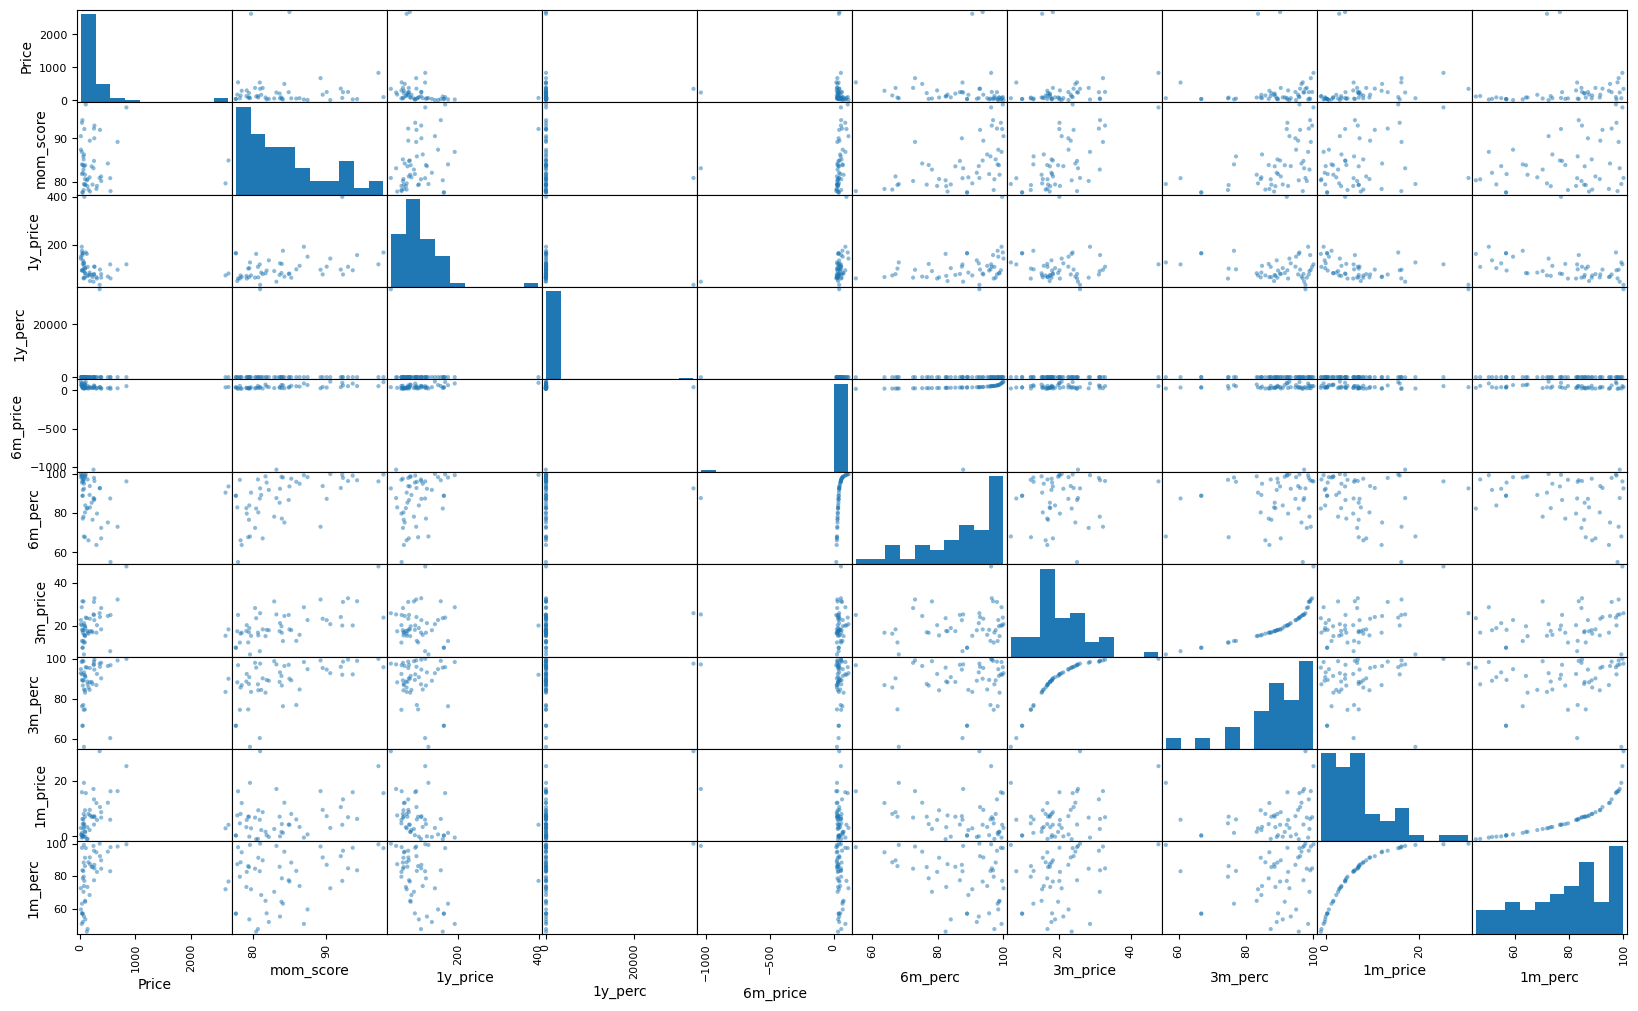

In [8]:
pd.plotting.scatter_matrix(data_drop, figsize=(20, 12))

Можно заметить, что зависимоти 3m_perc и 3m_price, отличаются графиком от тех же соотношений, но для 6 и 12 месяцев. Аналогичная история для 1месяца.

Избавимся от стороки с более чем -1000% 6m_price


In [9]:
data_drop.drop(data_drop[data_drop['6m_price'] < -100].index, axis=0, inplace=True)


Уберем 1y_price = 398%

In [10]:
data_drop.drop(data_drop[data_drop['1y_price'] > 300].index, axis=0, inplace=True)

Уберем 1y_perc = 3k%

In [11]:
data_drop.drop(data_drop[data_drop['1y_perc'] > 3000].index, axis=0, inplace=True)

In [12]:
data_drop.dropna(inplace=True)

In [18]:
data_drop.drop(data_drop[data_drop.duplicated()].index, inplace=True)

In [19]:
data_drop

,Price,mom_score,1y_price,1y_perc,6m_price,6m_perc,3m_price,3m_perc,1m_price,1m_perc
0,102.81,97.82,167.05,98.42,110.39,99.80,23.90,95.84,15.58,97.23
1,836.32,97.13,117.59,92.67,57.08,96.24,47.60,100.00,25.29,99.60
2,42.36,94.21,156.16,97.43,58.69,96.83,31.47,99.01,6.28,83.56
3,32.72,93.61,92.75,85.54,91.00,99.21,20.26,92.28,15.90,97.43
4,258.87,92.97,107.52,91.09,57.23,96.44,32.85,99.60,6.90,84.75
5,251.21,92.28,75.22,76.83,65.90,98.02,31.15,98.61,13.32,95.64
7,359.10,91.98,95.71,86.73,43.62,92.87,24.16,96.04,10.55,92.28
8,13.97,90.54,141.58,96.83,116.28,100.00,20.86,92.87,3.04,72.48
9,256.84,90.05,107.93,91.29,38.78,87.33,22.71,94.65,7.28,86.93
10,175.12,89.50,75.48,77.23,46.15,93.86,23.37,95.45,9.54,91.49


Для более качественного подбора поиска аномалий воспользуемся распространненым способом One-Class SVM. 

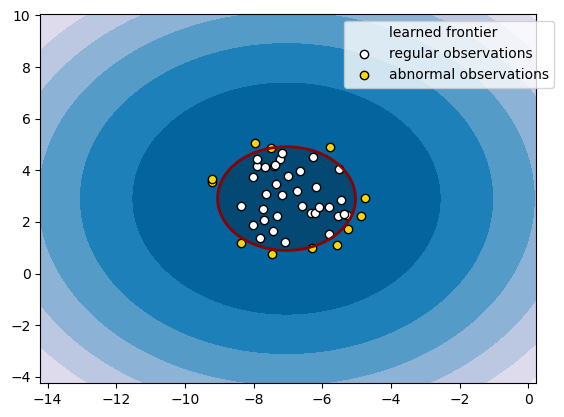

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# load the data
x = data_drop

# rescale the data
x_scaled = MinMaxScaler().fit_transform(x)

# reduce the data to 2 dimensions using t-SNE
x_reduced = TSNE(n_components=2, random_state=0).fit_transform(x_scaled)

# fit the model to the reduced data
svm = OneClassSVM(kernel='rbf', nu=0.2, gamma=1e-04)
svm.fit(x_reduced)

# extract the model predictions
x_predicted = svm.predict(x_reduced)

# define the meshgrid
x_min, x_max = x_reduced[:, 0].min() - 5, x_reduced[:, 0].max() + 5
y_min, y_max = x_reduced[:, 1].min() - 5, x_reduced[:, 1].max() + 5

x_ = np.linspace(x_min, x_max, 500)
y_ = np.linspace(y_min, y_max, 500)

xx, yy = np.meshgrid(x_, y_)

# evaluate the decision function on the meshgrid
z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# plot the decision function and the reduced data
plt.contourf(xx, yy, z, cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')
b = plt.scatter(x_reduced[x_predicted == 1, 0], x_reduced[x_predicted == 1, 1], c='white', edgecolors='k')
c = plt.scatter(x_reduced[x_predicted == -1, 0], x_reduced[x_predicted == -1, 1], c='gold', edgecolors='k')
plt.legend([a.collections[0], b, c], ['learned frontier', 'regular observations', 'abnormal observations'], bbox_to_anchor=(1.05, 1))
plt.axis('tight')
plt.show()

In [28]:
clf = OneClassSVM(kernel='rbf', nu=0.2, gamma=1e-04).fit(data_drop)

In [35]:
result = clf.predict(data_drop)
_func =np.vectorize(lambda x: False if x == 1 else True)
result = _func(result)
result

array([ True,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False])

In [36]:
data_drop.iloc[result, :]

,Price,mom_score,1y_price,1y_perc,6m_price,6m_perc,3m_price,3m_perc,1m_price,1m_perc
0,102.81,97.82,167.05,98.42,110.39,99.80,23.90,95.84,15.58,97.23
1,836.32,97.13,117.59,92.67,57.08,96.24,47.60,100.00,25.29,99.60
8,13.97,90.54,141.58,96.83,116.28,100.00,20.86,92.87,3.04,72.48
11,676.70,89.21,95.05,86.34,29.11,73.07,32.27,99.21,16.29,98.22
13,30.45,86.93,190.82,99.41,92.29,99.41,28.69,98.42,-0.44,50.50
17,2678.61,84.95,79.20,79.41,45.81,93.66,18.42,90.10,4.17,76.63
19,501.39,84.26,66.53,70.30,30.17,75.25,24.64,96.44,12.12,95.05
33,543.80,80.89,117.22,92.48,38.83,87.52,8.33,60.59,6.00,82.97
38,2625.42,79.70,71.46,72.87,41.37,90.50,15.47,83.56,2.90,71.88
39,69.20,79.55,125.48,94.65,26.19,68.12,6.83,56.24,19.27,99.21


Полученные из алгоритма величины можно интерпретировать как максимальные отклоненные от гиперповерхности, которую строит SVM. И если внимательно присмотреться в таблицу, то действительно значения сильно отклоняются от средних. Их можно как отставить так и удалить, в зависимоти от нащего дальнейшего анализа.